In [118]:
import Bio
from Bio import SearchIO
from Bio import SeqIO, Entrez
from Bio.PDB import PDBList, PDBParser
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight
from Bio.Blast import NCBIWWW, NCBIXML
from collections import defaultdict, Counter
import matplotlib.pyplot as plt 
import seaborn as sns   
import nglview as nv

# Fetch COVID-19 Genome from NCBI#


MN908947 - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019

In [36]:
def GC(seq):
    return ((seq.count('G') + seq.count('C')) / len(seq) * 100)


In [5]:
Entrez.email = "olabuntufizzy@gmail.com"

In [17]:
covid = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
covid_record = SeqIO.read(covid, "genbank")

In [18]:
type(covid_record)

Bio.SeqRecord.SeqRecord

In [20]:
covid_seq = covid_record.seq
covid_seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [23]:
print(f'lenght of the covid sequence is {len(covid_seq)}') 

lenght of the covid sequence is 29903


In [33]:
print(f'Molecular weight of the covid sequence is {molecular_weight(covid_seq)}')

Molecular weight of the covid sequence is 9241219.214400413


In [37]:
print(f'GC content of the covid sequence is {GC(covid_seq)}')

GC content of the covid sequence is 37.97277865097147


# TRANSCRIBSION

In [41]:
transcribed_covid_seq = covid_seq.transcribe()
transcribed_covid_seq

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [44]:
dic = defaultdict(int)
for i in transcribed_covid_seq:
    dic[i] += 1

dic

defaultdict(int, {'A': 8954, 'U': 9594, 'G': 5863, 'C': 5492})

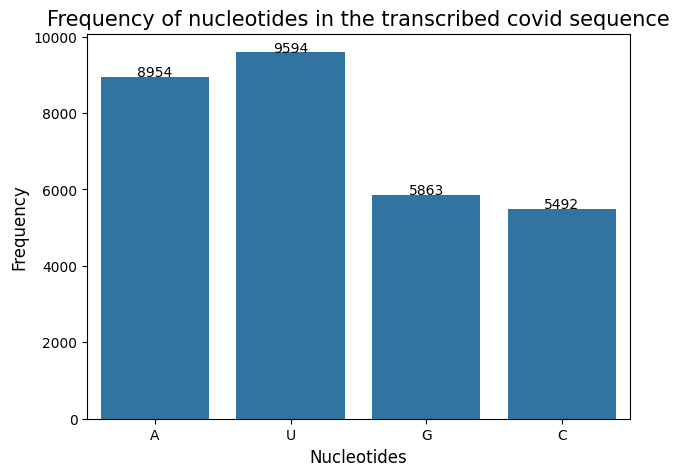

In [47]:
plt.figure(figsize=(7, 5))
sns.barplot(x=list(dic.keys()), y=list(dic.values()))
plt.title('Frequency of nucleotides in the transcribed covid sequence', fontsize=15)
plt.xlabel('Nucleotides', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in range(len(dic)):
    plt.text(i, dic[list(dic.keys())[i]], dic[list(dic.keys())[i]], ha = 'center')
plt.show()

# TRANSLATION

In [58]:
translation = transcribed_covid_seq.translate()
translation

/home/olabuntufizzy/.local/lib/python3.10/site-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [52]:
Counter(translation)

Counter({'L': 886,
         'S': 810,
         '*': 774,
         'T': 679,
         'C': 635,
         'F': 593,
         'R': 558,
         'V': 548,
         'Y': 505,
         'N': 472,
         'I': 436,
         'K': 413,
         'G': 394,
         'A': 375,
         'H': 332,
         'Q': 325,
         'P': 292,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

In [67]:
print (f'Sum of Amino acids in the transcribed covid sequence is {len(translation.replace("*", ""))}')

Sum of Amino acids in the transcribed covid sequence is 9193


In [63]:
translation

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [69]:
aa = Counter(translation.replace("*", ""))
aa

Counter({'L': 886,
         'S': 810,
         'T': 679,
         'C': 635,
         'F': 593,
         'R': 558,
         'V': 548,
         'Y': 505,
         'N': 472,
         'I': 436,
         'K': 413,
         'G': 394,
         'A': 375,
         'H': 332,
         'Q': 325,
         'P': 292,
         'D': 290,
         'E': 270,
         'W': 263,
         'M': 117})

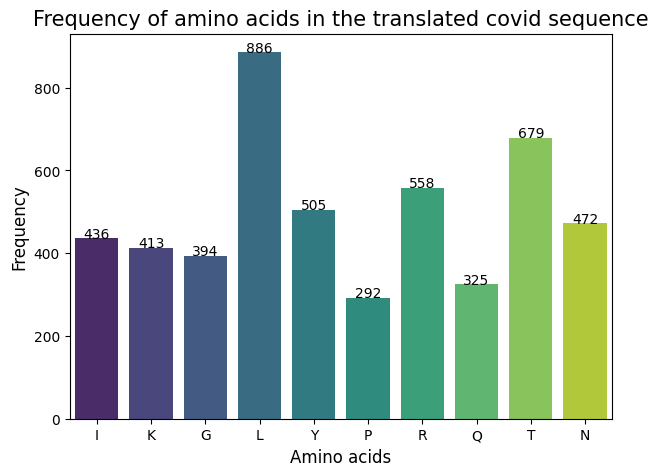

In [75]:
plt.figure(figsize=(7, 5))
sns.barplot(x=(list(aa.keys()))[:10], y=(list(aa.values()))[:10], palette='viridis', hue=(list(aa.keys()))[:10])
plt.title('Frequency of amino acids in the translated covid sequence', fontsize=15)
plt.xlabel('Amino acids', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in range(10):
    plt.text(i, aa[list(aa.keys())[i]], aa[list(aa.keys())[i]], ha = 'center')
plt.show()

In [50]:
proteins = translation.split('*')
print ('number of proteins:', len(proteins))

number of proteins: 775


In [78]:
functional_proteins = [protein for protein in proteins if len(protein) > 20]
len(functional_proteins)

73

In [87]:
functional_proteins = sorted(functional_proteins, key=len, reverse=True)
longest_protein = functional_proteins[0]
len(longest_protein)


2701

In [88]:
str(longest_protein)

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [93]:
with open('longest_protein.fasta', 'w') as file:
    file.write(f'> covid protein\n {str(longest_protein)}')
    print('longest protein written to file')

longest protein written to file


# BLAST search of COVID
Now that we have obtain our protein sequence, let’s now performing the NCBI BLAST (Basic Local Alignment Search Tool) and list the parameters to identify the best aligned sequence

In [123]:
protein = SeqIO.read('longest_protein.fasta', 'fasta')
protein

SeqRecord(seq=Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'), id='covid', name='covid', description=' covid protein', dbxrefs=[])

In [98]:
blast_rest = NCBIWWW.qblast('blastp', 'pdb', protein.seq)


In [99]:
results = SearchIO.read(blast_rest, 'blast-xml')
results

QueryResult(id='unnamed', 50 hits)

In [106]:
for result in results[:5]:
    print(result)

Query: unnamed
       protein product
  Hit: pdb|7D4F|A (943)
       Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrom...
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0         0    1938.70     926          [4:930]                [8:934]
Query: unnamed
       protein product
  Hit: pdb|6YYT|A (935)
       Chain A, nsp12 [Severe acute respiratory syndrome coronavirus 2]
 HSPs: ----  --------  ---------  ------  ---------------  ---------------------
          #   E-value  Bit score    Span      Query range              Hit range
       ----  --------  ---------  ------  ---------------  ---------------------
          0         0    1938.31     925          [4:929]               [10:935]
Query: unnamed
       protein product
  Hit: pdb|6XEZ|A (932)
       Chain 

In [109]:
id = results[1].id
id = id.split('|')[1]
id

'6YYT'

In [110]:
! wget https://files.rcsb.org/download/{id}.pdb

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/olabuntufizzy/.wget-hsts'. HSTS will be disabled.
--2024-07-14 13:41:06--  https://files.rcsb.org/download/6YYT.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.159.157
Connecting to files.rcsb.org (files.rcsb.org)|128.6.159.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘6YYT.pdb’

6YYT.pdb                [       <=>          ] 954.99K   617KB/s    in 1.5s    

2024-07-14 13:41:09 (617 KB/s) - ‘6YYT.pdb’ saved [977913]



In [116]:
protein = PDBParser().get_structure(f'{id}', f'{id}.pdb')
protein

/home/olabuntufizzy/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12060.
  warnings.warn(


<Structure id=6YYT>

In [122]:
for chain in protein.get_chains():
    print(chain)

<Chain id=A>
<Chain id=B>
<Chain id=C>
<Chain id=D>
<Chain id=P>
<Chain id=Q>
<Chain id=T>
<Chain id=U>


In [ ]:
nv.show_biopython(protein, gui=True)